In [86]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import style
from collections import Counter
style.use('fivethirtyeight') #Shows Grid
import pandas as pd
import random

In [87]:
dataset = {'k' : [[1,2],[2,3],[3,1]], 'r': [[6,5],[7,7],[8,6]]}
new_features = [5,7]

def class_counts(votes):
    counts = {}
    for vote in votes:
        if(vote not in counts):
            counts[vote] = 0
        counts[vote]+=1
    return counts

def get_result(counts):
    max = 0
    ans = None
    for group in counts:
        if(max<counts[group]):
            max = counts[group]
            ans = group
    return ans

def k_nearest_neighbours(data,predict,k=3):
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance,group])
    votes = [i[1] for i in sorted(distances)[:k]]
   # print(votes)
    counts = class_counts(votes)
   # print(counts)
    vote_result = get_result(counts)
   # print(vote_result)
   # print(Counter(votes))
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result

In [88]:
result = k_nearest_neighbours(dataset,new_features,5)
print(result)

r


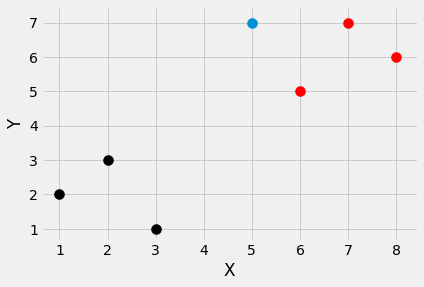

In [89]:
plt.xlabel('X')
plt.ylabel('Y')

for i in dataset:
    for ii in dataset[i]:
        plt.scatter(ii[0],ii[1],s=100,color = i)
plt.scatter(new_features[0],new_features[1],s=100)
plt.show()

In [90]:
df = pd.read_csv('Breast-Cancer.csv')
df.replace('?',-99999,inplace = True)
df.drop(['id'],1,inplace=True)
full_data = df.astype(float).values.tolist()

In [91]:
random.shuffle(full_data)
test_size = 0.2
train_set = {2:[] , 4:[]}
test_set = {2:[] , 4:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

In [92]:
for i in train_data:
    train_set[i[-1]].append(i[:-1])
for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [93]:
accuracy = []
z = [i for i in range(1,100)]
for k in range(1,100):
    correct = 0
    total = 0
    for group in test_set:
        for data in test_set[group]:
            vote = k_nearest_neighbours(train_set,data,k)
            if group == vote:
                correct+=1
            total+=1
    accuracy.append(correct/total)

0.9784172661870504 96


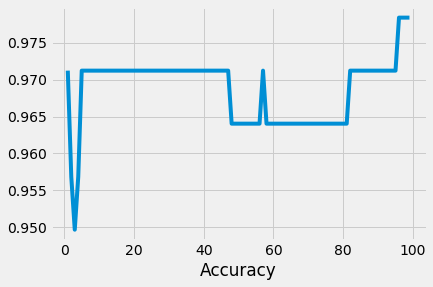

In [94]:
print(max(accuracy),accuracy.index(max(accuracy))+1)
plt.xlabel("k")
plt.xlabel("Accuracy")
plt.plot(z,accuracy)
plt.show()